In [ ]:
import sys
import os
sys.path.append(os.path.abspath("../"))

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.manifold import TSNE

In [4]:
move_tensors = torch.load('../evaluation/move_vector.pt').detach().numpy().copy()
pokemon_tensors = torch.load('../evaluation/pokemon_vector.pt').detach().numpy().copy()

In [5]:
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)

move_tensors = tsne.fit_transform(move_tensors)
move_tensors = pd.DataFrame(move_tensors, columns = ['col1', 'col2'])

pokemon_tensors = tsne.fit_transform(pokemon_tensors)
pokemon_tensors = pd.DataFrame(pokemon_tensors, columns = ['col1', 'col2'])

In [6]:
print(len(pokemon_tensors), len(move_tensors))

1010 900


In [11]:
import json
import sys
import os
sys.path.append(os.path.abspath("../"))
from learning.Entity.Move import Move
from learning.Entity.Pokemon import Pokemon

pokemons: list[Pokemon] = []
moves: list[Move] = []
with open(
    "D:/tanaka/Documents/poke-move/data/my-dataset/pokemons.json",
    "r",
    encoding="utf-8",
) as f:
    original_pokemons = json.load(f)
for p in original_pokemons:
    pokemon = Pokemon(
        pokemon_id=p["pokemon_id"],
        name=p["name"],
        types=p["types"],
        egg_groups=p["egg_groups"],
        base_experience=p["base_experience"],
        abilities=p["abilities"],
        height=p["height"],
        weight=p["weight"],
        stats=p["stats"],
        color=p["color"],
        shape=p["shape"],
        is_legendary=p["is_legendary"],
        is_baby=p["is_baby"],
        is_mythical=p["is_mythical"],
    )
    pokemons.append(pokemon)

with open(
    "D:/tanaka/Documents/poke-move/data/my-dataset/moves.json",
    "r",
    encoding="utf-8",
) as f:
    original_moves = json.load(f)
for m in original_moves:
    move = Move(
        move_id=m["move_id"],
        name=m["name"],
        move_type=m["move_type"],
        description=m["description"],
        accuracy=m["accuracy"],
        damage_class=m["damage_class"],
        power=m["power"],
        pp=m["pp"],
        priority=m["priority"],
        can_learn_machine=m["can_learn_machine"],
    )
    moves.append(move)


In [23]:
import numpy as np
import matplotlib

def draw(tensors, labels, name="sample.png"):
    fig = plt.figure(figsize = (50, 50))
    colors = list(matplotlib.colors.CSS4_COLORS.values())
    category_list = list(set(labels))
    # category_list = list(set(filtering_label))
    for i, v in enumerate(category_list):
        color_filtering_label = np.array(labels)
        category_mask = color_filtering_label == np.array(v)

        tmp_df = tensors[category_mask]

        plt.scatter(tmp_df['col1'],
                    tmp_df['col2'],
                    label = v,
                    color = colors[i])

    plt.legend(fontsize = 50)
    fig.savefig(name)

In [28]:
# label作成
pokemon_labels = [p.shape for p in pokemons] 
moves_labels = [m.move_type for m in moves]

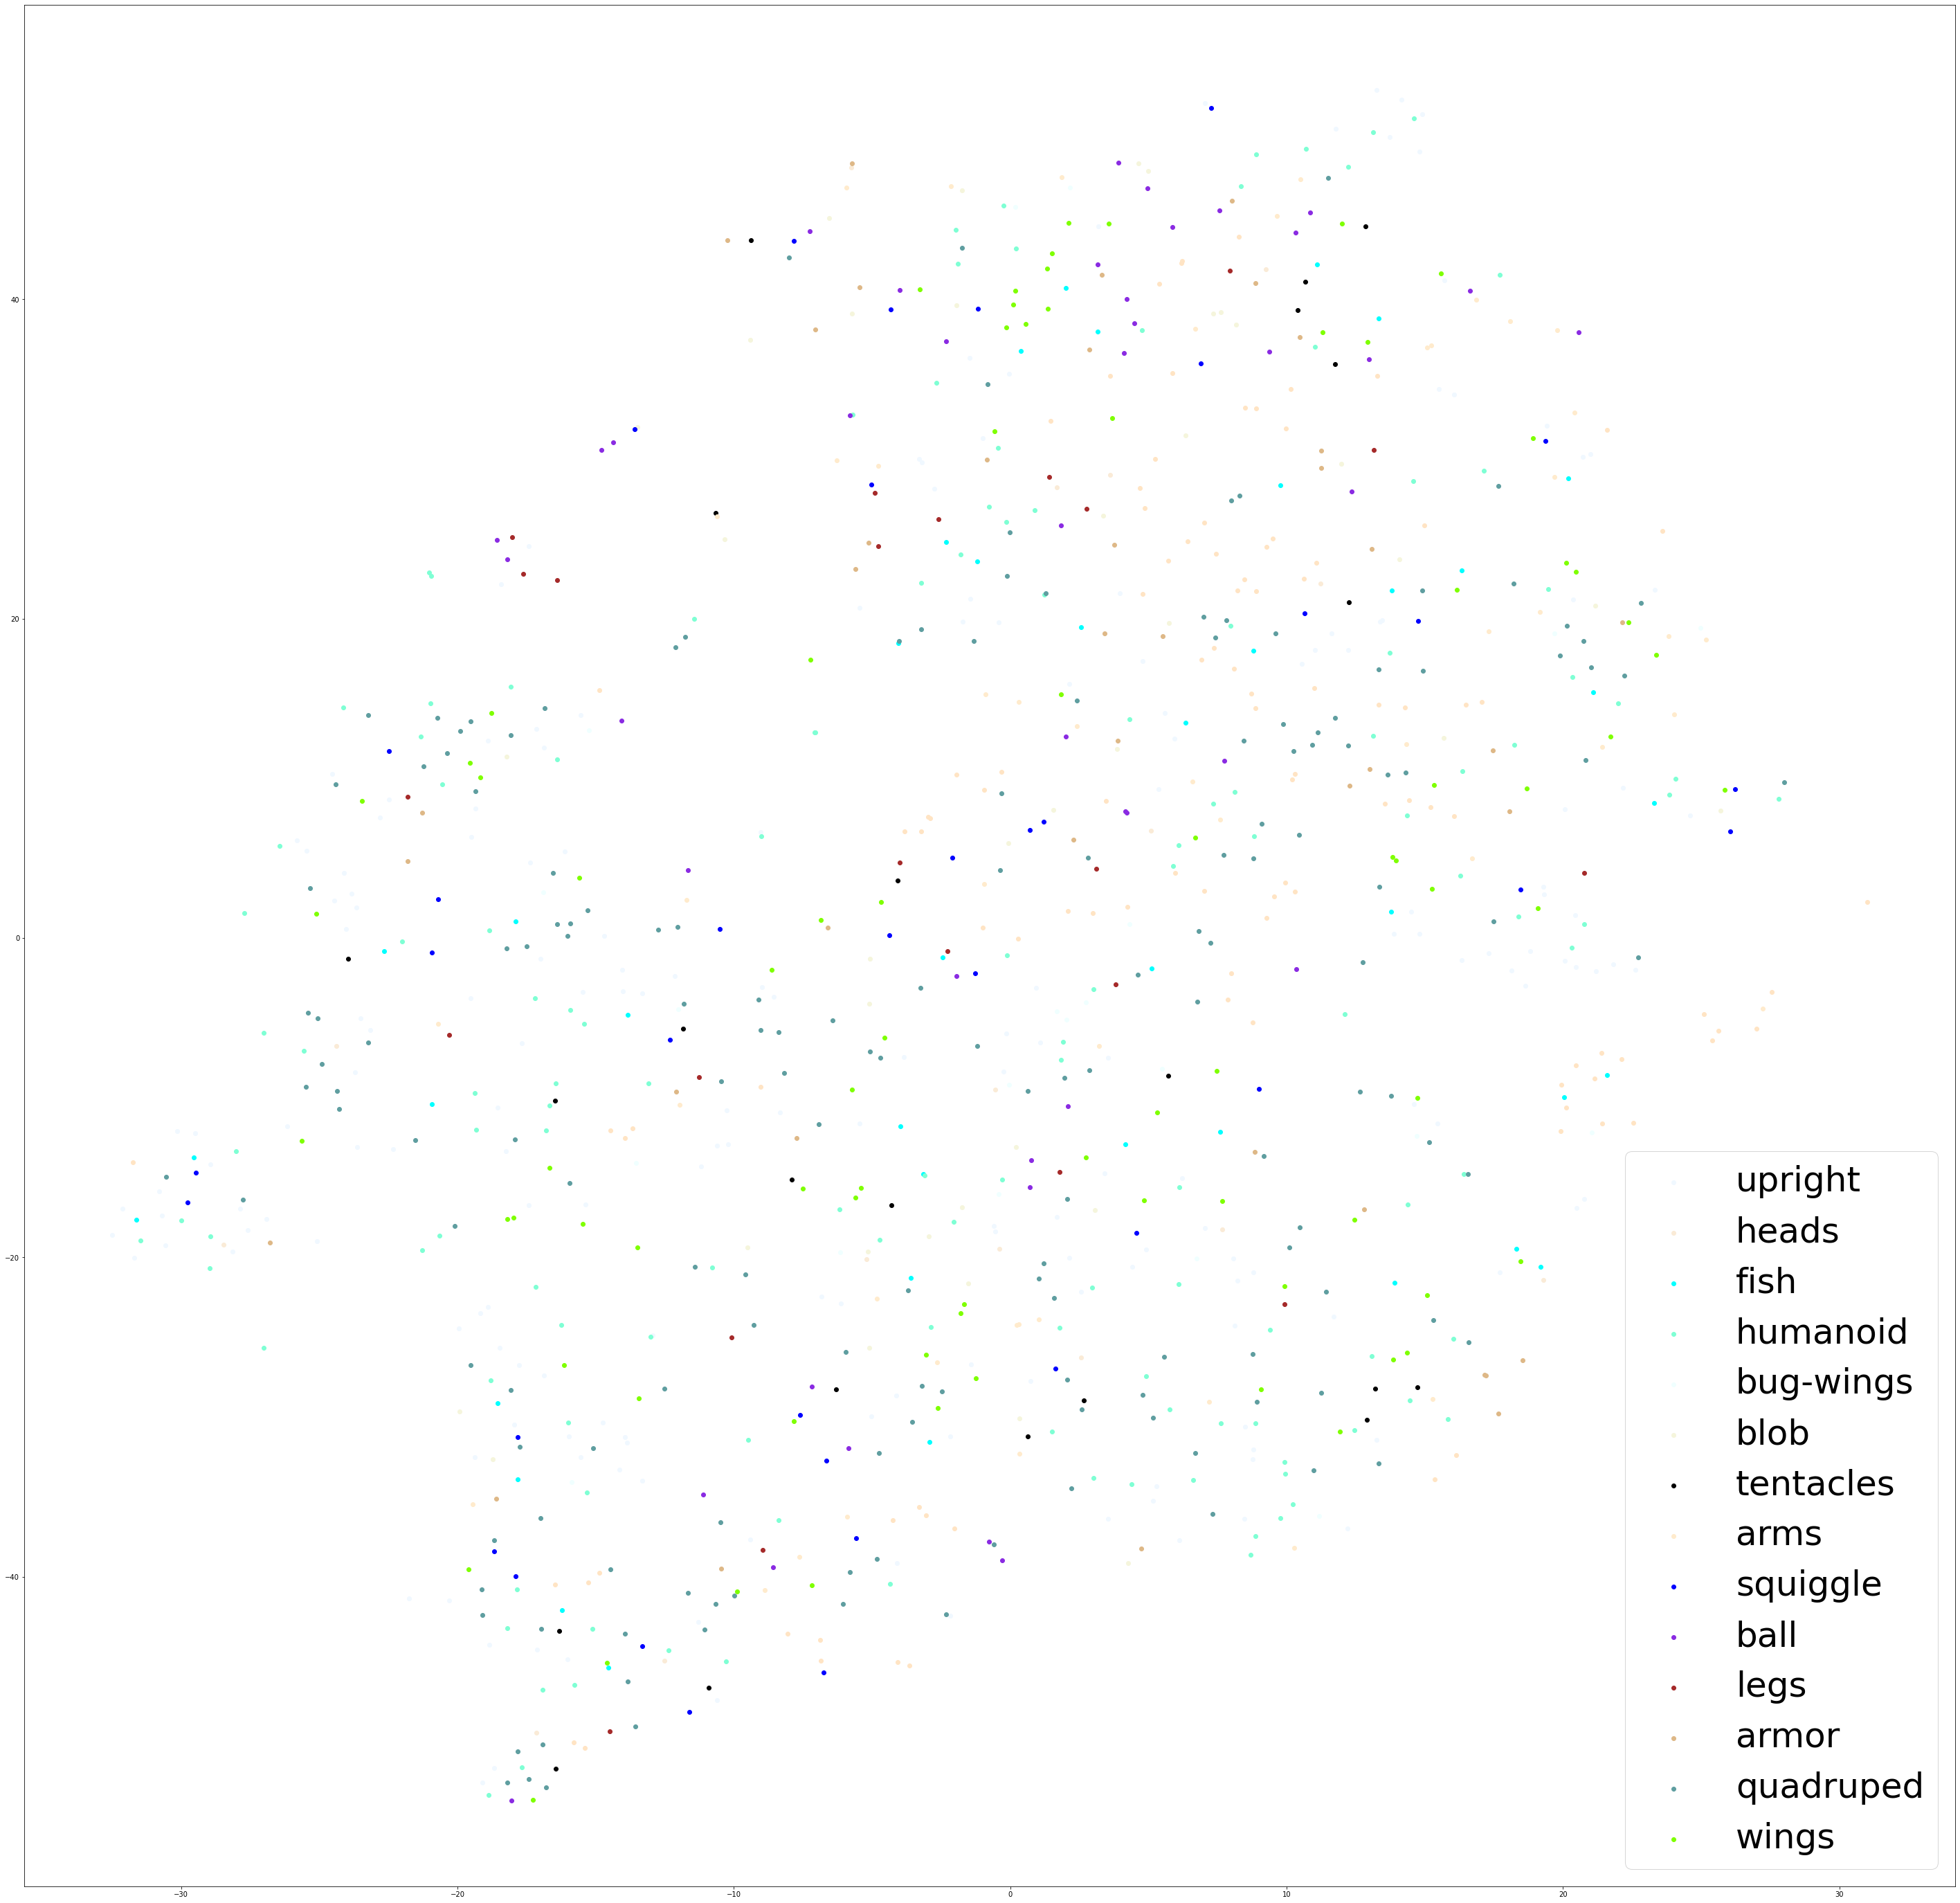

In [29]:
draw(pokemon_tensors, pokemon_labels, "shape.png")